In [17]:
import pandas as pd
import seaborn as sns

true = pd.read_csv('./data/True.csv')
fake = pd.read_csv('./data/Fake.csv')

true.head()
# fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [18]:
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [19]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [20]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [21]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [22]:
true['label'] = 1
fake['label'] = 0

frames = [true.loc[:][:], fake.loc[:][:]]

df = pd.concat(frames)

df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


<Axes: xlabel='label', ylabel='count'>

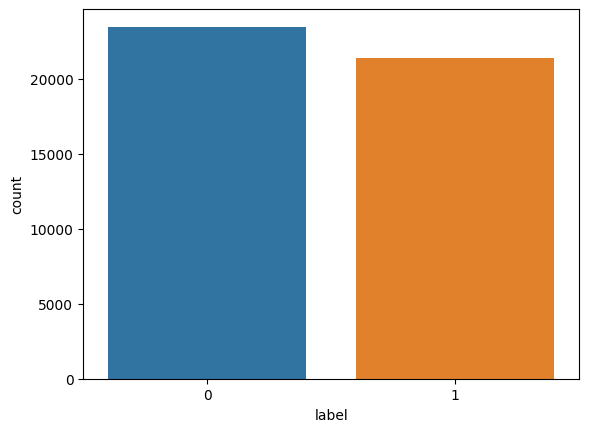

In [23]:
sns.countplot(data = df, x = 'label')

<Axes: xlabel='Year', ylabel='count'>

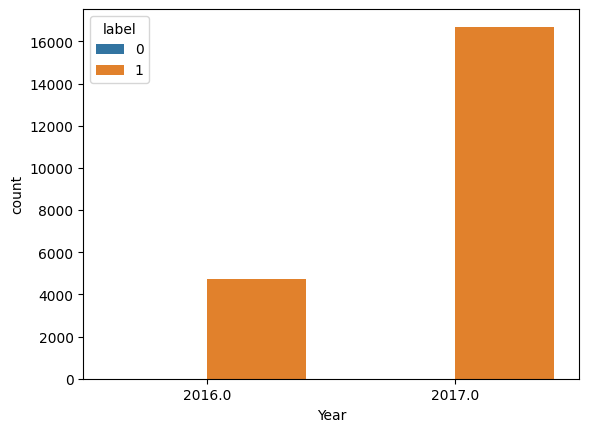

In [24]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

sns.countplot(data = df, x = 'Year', hue ='label')

In [25]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

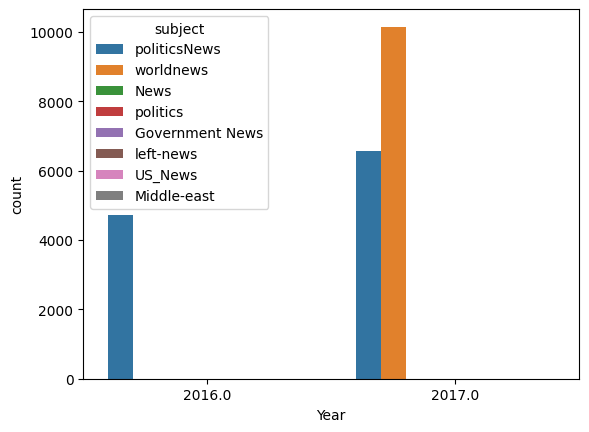

In [26]:
sns.countplot(data = df, x = 'Year', hue ="subject")

In [27]:
frames = [true.head(200), fake.head(200)]
df = pd.concat(frames)
X = df.drop('label', axis = 1)
y = df['label']

In [28]:
df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace=True)
df2.tail()

,index,title,text,subject,date,label
395,195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,"October 23, 2017",0
396,196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,"October 22, 2017",0
397,197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",0
398,198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,"October 21, 2017",0
399,199,"Trump Takes Credit For Releasing JFK Files, B...","Saturday morning, Trump was going through his ...",News,"October 21, 2017",0


In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []

for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['title'][i]) # regex
    review = review.lower()
    review = review.split() # split into list
    review = [ps.stem(word) for word in review
              if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(corpus)

['u budget fight loom republican flip fiscal script', 'u militari accept transgend recruit monday pentagon', 'senior u republican senat let mr mueller job', 'fbi russia probe help australian diplomat tip nyt', 'trump want postal servic charg much amazon shipment', 'white hous congress prepar talk spend immigr', 'trump say russia probe fair timelin unclear nyt', 'factbox trump twitter dec approv rate amazon', 'trump twitter dec global warm', 'alabama offici certifi senat elect jone today despit challeng cnn', 'jone certifi u senat winner despit moor challeng', 'new york governor question constitution feder tax overhaul', 'factbox trump twitter dec vaniti fair hillari clinton', 'trump twitter dec trump iraq syria', 'man say deliv manur mnuchin protest new u tax law', 'virginia offici postpon lotteri draw decid tie statehous elect', 'u lawmak question businessman trump tower meet sourc', 'trump twitter dec hillari clinton tax cut bill', 'u appeal court reject challeng trump voter fraud pa

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.41832748, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.800


Text(0.5, 1.0, 'Confusion Matrix')

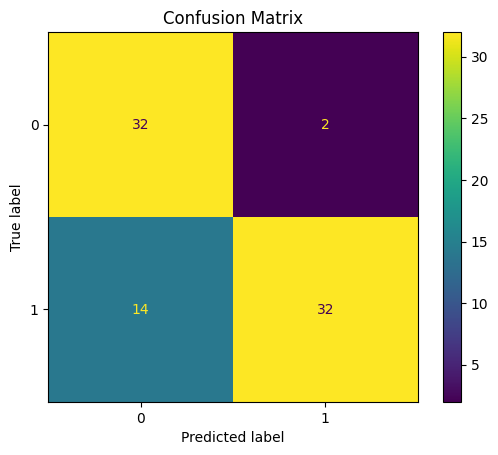

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

disp.ax_.set_title('Confusion Matrix')

In [35]:
import pickle

pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [36]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', df2['title'][i]) # regex
    review = review.lower()
    review = review.split() # split into list
    review = [ps.stem(word) for word in review
              if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidf_v.transform([review]).toarray()
    prediction = 'FAKE' if classifier.predict(review_vect)[0] == 0 else 'REAL'

    return prediction

In [37]:
text = "Former President Donald Trump on Tuesday launched a new communications platform, which will eventually give him the ability to communicate directly with his followers, after months of being banned from sites like Twitter and Facebook."
prediction = predict(text)
print(prediction)

FAKE
